<a href="https://colab.research.google.com/github/Raexann/Machine-Learning/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("/content/patient_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         22 non-null     int64 
 1   Gender                      22 non-null     object
 2   Ethnicity                   22 non-null     object
 3   BMI                         22 non-null     int64 
 4   Blood Pressure (systolic)   22 non-null     int64 
 5   Blood Pressure (diastolic)  22 non-null     int64 
 6   Heart Rate                  22 non-null     int64 
 7   Respiratory Rate            22 non-null     int64 
 8   Oxygen Saturation Level     22 non-null     int64 
 9   Chronic Conditions          22 non-null     object
 10  Medications                 22 non-null     object
 11  Lab Test Results            22 non-null     object
 12  Chief Complaint             22 non-null     object
 13  Severity                    22 non-null     object
d

In [4]:
#data preparation
data.isnull().sum()

Age                           0
Gender                        0
Ethnicity                     0
BMI                           0
Blood Pressure (systolic)     0
Blood Pressure (diastolic)    0
Heart Rate                    0
Respiratory Rate              0
Oxygen Saturation Level       0
Chronic Conditions            0
Medications                   0
Lab Test Results              0
Chief Complaint               0
Severity                      0
dtype: int64

In [5]:
data.head()

,Age,Gender,Ethnicity,BMI,Blood Pressure (systolic),Blood Pressure (diastolic),Heart Rate,Respiratory Rate,Oxygen Saturation Level,Chronic Conditions,Medications,Lab Test Results,Chief Complaint,Severity
0,45,Male,Caucasian,23,120,80,75,16,98,None,None,Normal,Chest Pain,Severe
1,30,Female,Hispanic,27,135,90,80,18,95,Hypertension,None,High Glucose,Headache,Moderate
2,65,Male,African,32,150,100,90,20,92,Diabetes,Insulin,Abnormal Sodium,Shortness of Breath,Severe
3,50,Female,Caucasian,29,140,95,70,14,96,None,Blood thinners,Normal,Chest Pain,Moderate
4,28,Male,Asian,25,115,75,80,16,97,None,None,Normal,Fever,Mild


In [6]:
def converter(Severity):
    if Severity=='Severe':
        return 2
    elif Severity=='Moderate':
        return 1
    elif Severity=='Mild':
        return 0

data['Severity']=data['Severity'].apply(converter)

In [7]:
data.head()

,Age,Gender,Ethnicity,BMI,Blood Pressure (systolic),Blood Pressure (diastolic),Heart Rate,Respiratory Rate,Oxygen Saturation Level,Chronic Conditions,Medications,Lab Test Results,Chief Complaint,Severity
0,45,Male,Caucasian,23,120,80,75,16,98,None,None,Normal,Chest Pain,2
1,30,Female,Hispanic,27,135,90,80,18,95,Hypertension,None,High Glucose,Headache,1
2,65,Male,African,32,150,100,90,20,92,Diabetes,Insulin,Abnormal Sodium,Shortness of Breath,2
3,50,Female,Caucasian,29,140,95,70,14,96,None,Blood thinners,Normal,Chest Pain,1
4,28,Male,Asian,25,115,75,80,16,97,None,None,Normal,Fever,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         22 non-null     int64 
 1   Gender                      22 non-null     object
 2   Ethnicity                   22 non-null     object
 3   BMI                         22 non-null     int64 
 4   Blood Pressure (systolic)   22 non-null     int64 
 5   Blood Pressure (diastolic)  22 non-null     int64 
 6   Heart Rate                  22 non-null     int64 
 7   Respiratory Rate            22 non-null     int64 
 8   Oxygen Saturation Level     22 non-null     int64 
 9   Chronic Conditions          22 non-null     object
 10  Medications                 22 non-null     object
 11  Lab Test Results            22 non-null     object
 12  Chief Complaint             22 non-null     object
 13  Severity                    22 non-null     int64 
d

In [9]:
df=data.select_dtypes(exclude=['object'])
print(df)

    Age  BMI  Blood Pressure (systolic)  Blood Pressure (diastolic)  \
0    45   23                        120                          80   
1    30   27                        135                          90   
2    65   32                        150                         100   
3    50   29                        140                          95   
4    28   25                        115                          75   
5    60   35                        170                         110   
6    40   26                        130                          85   
7    35   24                        118                          78   
8    55   31                        142                          95   
9    75   26                        130                          85   
10   48   33                        160                         100   
11   27   22                        110                          72   
12   58   30                        135                          90   
13   3

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         22 non-null     int64
 1   BMI                         22 non-null     int64
 2   Blood Pressure (systolic)   22 non-null     int64
 3   Blood Pressure (diastolic)  22 non-null     int64
 4   Heart Rate                  22 non-null     int64
 5   Respiratory Rate            22 non-null     int64
 6   Oxygen Saturation Level     22 non-null     int64
 7   Severity                    22 non-null     int64
dtypes: int64(8)
memory usage: 1.5 KB


In [11]:
#importing library
from sklearn.model_selection import train_test_split

In [12]:
#splitting train and test data
x=df.drop('Severity', axis='columns')
y=df.Severity
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [14]:
#fitting train data
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [15]:
#prediction
pred=clf.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,pred))
print(confusion_matrix(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      1.00      0.67         2
           2       1.00      0.33      0.50         3

    accuracy                           0.71         7
   macro avg       0.83      0.78      0.72         7
weighted avg       0.86      0.71      0.69         7

[[2 0 0]
 [0 2 0]
 [0 2 1]]


[Text(0.5, 0.875, 'Blood Pressure (diastolic) <= 84.5\ngini = 0.667\nsamples = 15\nvalue = [5, 5, 5]'),
 Text(0.3, 0.625, 'BMI <= 23.5\ngini = 0.278\nsamples = 6\nvalue = [5, 0, 1]'),
 Text(0.2, 0.375, 'Age <= 38.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(0.7, 0.625, 'Blood Pressure (diastolic) <= 87.5\ngini = 0.494\nsamples = 9\nvalue = [0, 5, 4]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.375, 'Blood Pressure (systolic) <= 155.0\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]')]

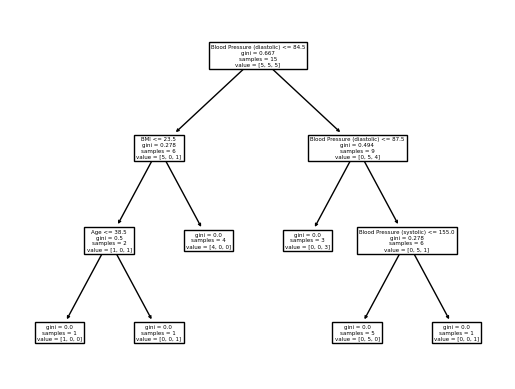

In [17]:
from sklearn import tree
tree.plot_tree(clf,feature_names=X_train.columns)